<a href="https://colab.research.google.com/github/polnops/changepoint_analysis/blob/master/poisson_cdf_overlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib import cycler


#drive.mount('/content/gdrive')

plt.style.use('classic')
%matplotlib inline

IPython_default = plt.rcParams.copy()
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', 
       labelcolor='white', labelsize = 12,
       axisbelow=True, prop_cycle=colors)
       
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='white')
plt.rc('ytick', direction='out', color='white')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

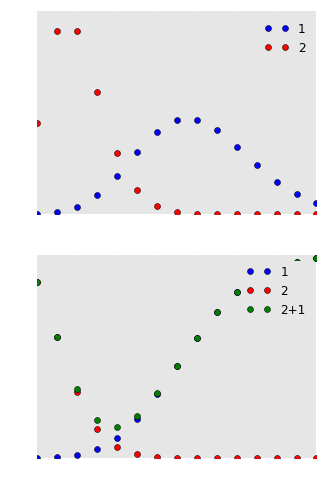

In [39]:

n1 = 8; n2 = 2;

x = np.arange(0,15,1)
p1 = poisson.pmf(x, n1);
p2 = poisson.pmf(x, n2);

k0 = np.argmin(np.abs(p1-p2))
c1 = poisson.cdf(x, n1);
c2 = poisson.cdf(x, n2);


fig = plt.subplots(2,1,figsize=(5,8))
ax1 = plt.subplot(2,1,1)

ax1.plot(x,p1,'bo',label='1')
ax1.plot(x,p2,'ro',label='2')
ax1.legend()

ax2 = plt.subplot(2,1,2)

ax2.plot(x,c1,'bo',label='1')
ax2.plot(x,1-c2,'ro',label='2')
ax2.plot(x,1-c2+c1,'go',label='2+1')
ax2.legend()

In [0]:
def getPoisson(n1,n2):

  nl,ng = np.sort((n1,n2)).tolist()
  x = np.arange(0,ng*2,1)
  p1 = poisson.pmf(x, nl);
  p2 = poisson.pmf(x, ng);
  c1 = poisson.cdf(x, nl);
  c2 = poisson.cdf(x, ng);

  return x,p1,p2,c1,c2

def findThreshold(c1,c2):
  i = 0
  while c1[i] < 1-c2[i]:
    i += 1
  return i, 1+c2[i]-c1[i]


def plotPoisson(x,p1,p2,c1,c2):
  fig = plt.subplots(2,1,figsize=(5,8))
  ax1 = plt.subplot(2,1,1)

  ax1.plot(x,p1,'bo',label='1')
  ax1.plot(x,p2,'ro',label='2')
  ax1.legend()

  ax2 = plt.subplot(2,1,2)

  ax2.plot(x,1-c1,'bo',label='1')
  ax2.plot(x,c2,'ro',label='2')
  ax2.plot(x,1+c2-c1,'go',label='2+1')
  ax2.legend()

def getOverlap(n1,n2):
  return np.exp(-(np.sqrt(n2)-np.sqrt(n1))**2)

In [75]:
npairs = [[0,6],[10,30],[25,60],[0,3]]

for pair in npairs:
  n1, n2 = pair
  x,p1,p2,c1,c2 = getPoisson(n1,n2)
  thres, err = findThreshold(c1,c2)
  #plotPoisson(x,p1,p2,c1,c2)

  print(getOverlap(n1,n2), err)




0.0024787521766663607 0.0024787521766662657
0.004705685367614807 0.020119206370020182
0.0005312206555560272 0.0060184087832551025
0.049787068367863965 0.04978706836786406


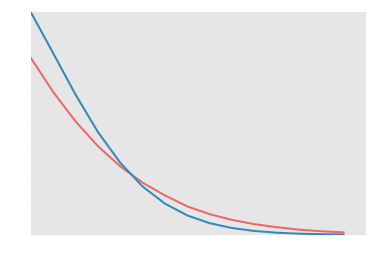

In [81]:


n2list = np.arange(30,60,2)
errlist = []; ovllist =[];
n1 = 25

for n2 in n2list:
  
  x,p1,p2,c1,c2 = getPoisson(n1,n2)
  thres, err = findThreshold(c1,c2)

  errlist.append(err)
  ovllist.append(getOverlap(n1,n2))
  
plt.plot(n2list,errlist)
plt.plot(n2list,ovllist)


